# Dog breed classification

## First change name of directories so they don't have prefixes

In [5]:
import os, sys

print(f'the dir is {os.listdir("../tmo")}')

the dir is ['Irish_setter', 'Pembroke', 'collie', 'Welsh_springer_spaniel', 'Staffordshire_bullterrier', 'Mexican_hairless', 'dingo', 'Afghan_hound', 'bull_mastiff', 'EntleBucher', 'Dandie_Dinmont', 'golden_retriever', 'Greater_Swiss_Mountain_dog', 'borzoi', 'African_hunting_dog', 'Sussex_spaniel', 'Japanese_spaniel', 'Lhasa', 'English_springer', 'Scottish_deerhound', 'otterhound', 'Scotch_terrier', 'Shih_Tzu', 'whippet', 'American_Staffordshire_terrier', 'Weimaraner', 'Pomeranian', 'Blenheim_spaniel', 'Old_English_sheepdog', 'Labrador_retriever', 'Rhodesian_ridgeback', 'giant_schnauzer', 'Chesapeake_Bay_retriever', 'Brittany_spaniel', 'Border_terrier', 'komondor', 'Boston_bull', 'Shetland_sheepdog', 'Newfoundland', 'pug', 'malamute', 'German_shepherd', 'Samoyed', 'Kerry_blue_terrier', 'boxer', 'Cardigan', 'Italian_greyhound', 'flat_coated_retriever', 'Maltese_dog', 'cocker_spaniel', 'Yorkshire_terrier', 'curly_coated_retriever', 'Rottweiler', 'Norfolk_terrier', 'Norwich_terrier', 'kuv

In [6]:
path = "../data/Images/"
folders = os.listdir(path)


In [7]:
for folder in folders:
    without_prefix = folder.split('-')[1:]
    full_name = '_'.join(without_prefix)
    os.rename(path + folder, path+full_name)

OSError: [Errno 39] Directory not empty: '../data/Images/Irish_setter' -> '../data/Images/'

## Exploring the data

In [8]:
all_pics = []
for folder in folders:
    for image in os.listdir('../data/Images/' + folder ):
        all_pics.append('Images/' + folder + '/' +image)

In [9]:
all_pics[5]

'Images/Irish_setter/n02100877_1061.jpg'

../data/Images/basset/n02088238_10741.jpg


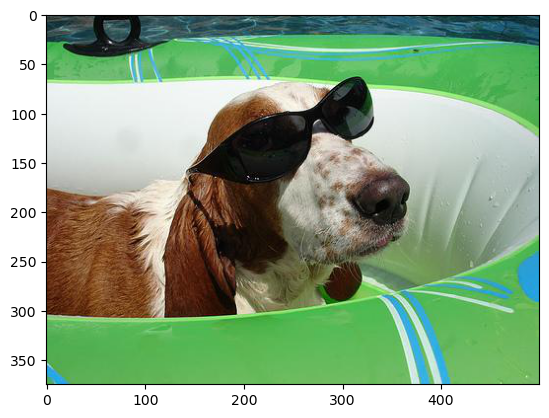

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from PIL import Image
random_photo = random.choice(all_pics)
random_photo = '../data/' + random_photo
im = Image.open(random_photo)
print(random_photo)
plt.imshow(im)

In [12]:
im_np = np.asarray(im)
im_np.shape

(277, 306, 3)

## Count how many photos per class

In [25]:
pics = []
for folder in folders:
    for image in os.listdir('../data/Images/' + folder ):
        pics.append([folder, image])

In [31]:
df = pd.DataFrame.from_dict(pics)
df = df.rename(columns={0:'race', 1:'picture'})

In [48]:
df.tail(5), df.shape

(        race             picture
 20575  cairn  n02096177_8173.jpg
 20576  cairn  n02096177_1659.jpg
 20577  cairn  n02096177_7701.jpg
 20578  cairn  n02096177_2263.jpg
 20579  cairn  n02096177_9708.jpg,
 (20580, 2))

In [50]:
counted_races =  df['race'].value_counts()

In [49]:
counted_races.mean()


171.5

## Create test dataset
Because I want to use ImageGenerator from tensorflow the data structure should look like this:
```
data
│   
└───train
│   │   
│   │
│   └───viszla
│   │   │   file111.png
│   │   │   file112.png
│   │   
│   └───basset
│       │   file115.png
│       │   file122.png
│       │   ...
│
└───test
│   │   
│   │
│   └───viszla
│   │   │   file111.png
│   │   │   file112.png
│   │   
│   └───basset
│       │   file115.png
│       │   file122.png
│       │   ...

```

In [52]:
pics_with_races = {}
for folder in folders:
    for image in os.listdir('../data/Images/' + folder ):
        if folder not in pics_with_races:
            pics_with_races[folder]  = [image]
        else:
            tmp = pics_with_races[folder]
            tmp.append(image)
            pics_with_races[folder] = tmp

In [54]:
import math
math.floor(len(pics_with_races['borzoi']) * 0.90)

135

In [55]:
os.path.exists('../data/test')

False